In [51]:

# Подключаем библиотеки для работы с изображениями и числами.

import cv2
import numpy as np
import matplotlib.pyplot as plt


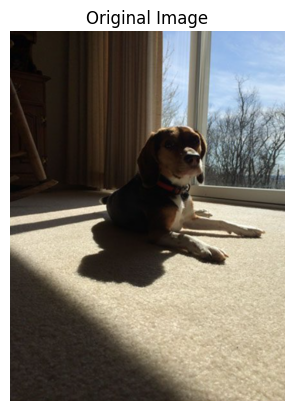

In [52]:

# Загружаем изображение.
# OpenCV читает в формате BGR, поэтому переводим в RGB.

image = cv2.imread("2.png")   # замени если имя другое
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [53]:

# Создаём функцию гамма-коррекции.
# Формула: T(r) = c * r^gamma

def gamma_correction(I_in, c, gamma):
    
    # Шаг 1: Нормализация (делаем диапазон 0–1)
    I_norm = I_in.astype('float32') / 255
    
    # Шаг 2: Применяем степень gamma
    I_gamma = c * (I_norm ** gamma)
    
    # Шаг 3: Возвращаем результат (пока в диапазоне 0–1)
    return I_gamma


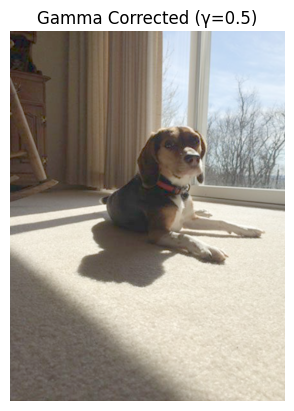

In [54]:

# Применяем gamma к изображению.

gamma_value = 0.5   # <1 светлее, >1 темнее

output = gamma_correction(image, 1, gamma_value)

plt.imshow(output)
plt.title(f"Gamma Corrected (γ={gamma_value})")
plt.axis("off")
plt.show()


In [55]:

# Пытаемся сохранить изображение.
# Оно будет почти чёрным, потому что диапазон 0–1.

cv2.imwrite("gamma_problem.jpg", output)


True

In [56]:

# Возвращаем диапазон 0–255 и переводим в uint8.

output_uint8 = (output * 255).astype('uint8')

cv2.imwrite("gamma_fixed.jpg",
            cv2.cvtColor(output_uint8, cv2.COLOR_RGB2BGR))


True

In [57]:

# Линейное растяжение контраста.
# Формула:
# s = ((smax - smin)/(rmax - rmin)) * (r - rmin) + smin

def contrast_stretching(i_in, s_min, s_max):
    
    r_min = np.min(i_in)
    r_max = np.max(i_in)
    
    s = ((s_max - s_min) / (r_max - r_min)) * (i_in - r_min) + s_min
    
    return s


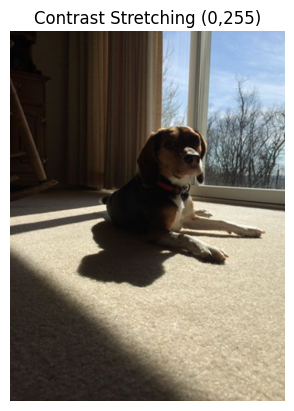

In [58]:

# Применяем растяжение контраста к обычному изображению.

contrast_output = contrast_stretching(image, 0, 255)

contrast_uint8 = contrast_output.astype('uint8')

plt.imshow(contrast_uint8)
plt.title("Contrast Stretching (0,255)")
plt.axis("off")
plt.show()


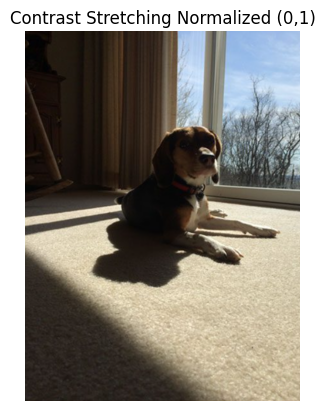

In [59]:

# Нормализуем изображение (0–1)
# И применяем contrast stretching с диапазоном 0–1.

image_norm = image.astype('float32') / 255

contrast_norm = contrast_stretching(image_norm, 0, 1)

plt.imshow(contrast_norm)
plt.title("Contrast Stretching Normalized (0,1)")
plt.axis("off")
plt.show()


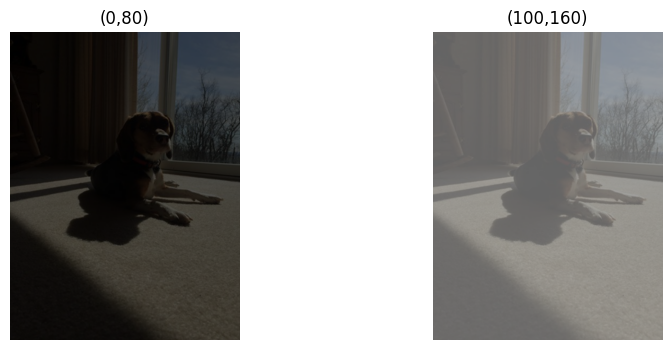

In [60]:

# Проверяем другие комбинации:
# (0,50) и (100,160)

combo1 = contrast_stretching(image, 0, 80).astype('uint8')
combo2 = contrast_stretching(image, 100, 160).astype('uint8')

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("(0,80)")
plt.imshow(combo1)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("(100,160)")
plt.imshow(combo2)
plt.axis("off")

plt.show()
